### **Manual Implementation of Neural Networks**

#### Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data handling

In [24]:
df = pd.read_csv('diabetes.csv')
df['gender'] = df['gender'].astype('category').cat.codes
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [25]:
# check number of samples
print(len(df))

100000


In [26]:
# get targets and convert to numpy array
y = df['diabetes'].to_numpy()
print(y)

[0 0 0 ... 0 0 0]


In [27]:
# apply minmax scaling 
df = (df - df.mean()) / df.std()

In [28]:
# get features
X = df.drop(columns = 'diabetes')
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841043,1.692695,-0.284438,4.936354,0.963322,-0.321054,1.001701,0.047704
1,-0.841043,0.538004,-0.284438,-0.202577,-1.153462,-0.000116,1.001701,-1.426203
2,1.187228,-0.616688,-0.284438,-0.202577,0.963322,-0.000116,0.161107,0.489876
3,-0.841043,-0.261398,-0.284438,-0.202577,-0.624266,-0.583229,-0.492688,0.416181
4,1.187228,1.515050,3.515669,4.936354,-0.624266,-1.081965,-0.679486,0.416181


In [29]:
# converting the dataframe into a data matrix
X = X.to_numpy()
print('Shape of Feature Set:', X.shape)
print('\nThe Data Matrix:')
print(X)

Shape of Feature Set: (100000, 8)

The Data Matrix:
[[-8.41042539e-01  1.69269508e+00 -2.84438025e-01 ... -3.21054186e-01
   1.00170072e+00  4.77039773e-02]
 [-8.41042539e-01  5.38003737e-01 -2.84438025e-01 ... -1.15583100e-04
   1.00170072e+00 -1.42620286e+00]
 [ 1.18722770e+00 -6.16687603e-01 -2.84438025e-01 ... -1.15583100e-04
   1.61107216e-01  4.89876028e-01]
 ...
 [ 1.18722770e+00  1.07093820e+00 -2.84438025e-01 ...  7.67288712e-02
   1.61107216e-01  4.16180686e-01]
 [-8.41042539e-01 -7.94332424e-01 -2.84438025e-01 ...  1.22035516e+00
  -1.42668050e+00 -9.34900580e-01]
 [-8.41042539e-01  6.71237353e-01 -2.84438025e-01 ... -7.36918292e-01
   1.00170072e+00 -1.18055172e+00]]


In [30]:
# the goal is to build a simple neural network with only one hidden layer of 3 neurons
# there will be 8 input neurons, 3 hidden neurons and one output neuron, which is the taregt 
# so all in all there will be 2 sets of weights: from input to hidden and hidden to output
# the hidden layer will have a bias vector and the output will also have a bias vector of shape (1, 1)

#### Initialize weights and biases

In [31]:
np.random.seed(100)

# input to hidden
weight_matrix_one = np.random.randn(3, 8) # 8 inputs from X and 3 neurons for the hidden layer
bias_vector_one = np.random.randn(3, )

# hidden to output
weight_matrix_two = np.random.randn(1, 3)
bias_vector_two = np.random.randn(1, )

print('Weight Matrix One:\n', weight_matrix_one, '\n\nBias Vector One:', bias_vector_one, '\n\nWeight Matrix Two:', weight_matrix_two, '\n\nBias Vector Two:', bias_vector_two)

Weight Matrix One:
 [[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079  0.51421884
   0.22117967 -1.07004333]
 [-0.18949583  0.25500144 -0.45802699  0.43516349 -0.58359505  0.81684707
   0.67272081 -0.10441114]
 [-0.53128038  1.02973269 -0.43813562 -1.11831825  1.61898166  1.54160517
  -0.25187914 -0.84243574]] 

Bias Vector One: [0.18451869 0.9370822  0.73100034] 

Weight Matrix Two: [[ 1.36155613 -0.32623806  0.05567601]] 

Bias Vector Two: [0.22239961]


#### Supporting functions

In [32]:
# sigmoid activation function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x)) # the lack of brackets was what's causing the inf problem

In [33]:
# function to calculate the avergae of forward pass across all samples
def arr_avg(lst):
    sum = 0
    for num in lst:
        sum += num
    return sum / len(lst)

#### Sample implementation of forward Pass 

In [34]:
losses = []
y_caps = []

for i in range(len(X)):
    z1 = np.dot(weight_matrix_one, X[i]) + bias_vector_one
    s = sigmoid(z1)
    z2 = np.dot(weight_matrix_two, s) + bias_vector_two
    y_cap = sigmoid(z2)
    y_caps.append(y_cap)
    loss = np.power((y[i] - y_cap), 2)
    losses.append(loss)

In [35]:
# get loss value for first iteration
final_loss = arr_avg(losses)
print(final_loss)

[0.4335185]


In [36]:
# backpropagation theory
# now we need to find partial derivative of the loss w.r.t the wights from hidden to output layer
# this is basically, dL/dW2 = dL/dy_cap * dy_cap / dz2 * dz2 / dW2 (using chain rule)
# similarly, dL/db2 = dL/dy_cap * dy_cap / dz2 * dz2 / db2
# this will be used ot update the weights and biases by a learning rate

In [37]:
# sigmoid activation function gradient
def sigmoid_grad(x):
    return x * (1 - x)

#### Overall implementation of the neural network

In [38]:
def my_nn(X, y, weight_matrix_one, bias_vector_one, weight_matrix_two, bias_vector_two, l_r = 0.001):
    losses = []
    y_caps = []
    hiddens = []
    all_loss = []
    l_r = 0.001 # learning rate

    for i in range(len(X)):
        
        # forward pass
        z1 = np.dot(weight_matrix_one, X[i]) + bias_vector_one
        s = sigmoid(z1)
        hiddens.append(s)

        z2 = np.dot(weight_matrix_two, s) + bias_vector_two
        y_cap = sigmoid(z2)
        y_caps.append(y_cap)

        loss = np.power((y[i] - y_cap), 2)
        losses.append(loss)

    # loss calculation
    final_loss = arr_avg(losses)
    all_loss.append(final_loss)

    for i in range(len(X)):
        
        # backpropagation
        dLdy_cap = -2 * (y[i] - y_caps[i])
        dy_capdz2 = sigmoid_grad(y_caps[i]) 
        dz2dW2 = hiddens[i] # this is supposed to be what is inside the hidden layer, not X[i]
        dz2db2 = 1  

        dLdW2 = dLdy_cap * dy_capdz2 * dz2dW2 # weight matrix two
        dLdb2 = dLdy_cap * dy_capdz2 * dz2db2 # bias vector two

        dz2dh = weight_matrix_two 
        dhdz1 = sigmoid_grad(hiddens[i]) 
        dz1dW1 = X[i] 
        dz1db1 = 1 

        dLdz1 = (dLdy_cap * dy_capdz2 * dz2dh).reshape(-1) * dhdz1 # this set of operations are common between dLdW1 & dLdb1
        dLdW1 = np.outer(dLdz1, dz1dW1) # weight matrix one (np.outer basically makes (3,) and (8,) to a (3, 8) matrix)
        dLdb1 = dLdz1 * dz1db1 # bias vector one

        # updation on the fly (vanila gradient descent)
        weight_matrix_two -= l_r * dLdW2
        bias_vector_two -= l_r * dLdb2
        weight_matrix_one -= l_r * dLdW1
        bias_vector_one -= l_r * dLdb1
    
    return weight_matrix_one, bias_vector_one, weight_matrix_two, bias_vector_two, final_loss

In [39]:
# note: the gradient weight matrix and the actual weight matrix should always be the same shape

#### Training time!

In [41]:
# random initializations of weights and biases
W1 = np.random.randn(32, X.shape[1])
b1 = np.random.randn(32,)
W2 = np.random.randn(1, 32)
b2 = np.random.randn(1,)

epochs = 10
losses = []
for i in range(epochs + 1):
    weight_matrix_one, bias_vector_one, weight_matrix_two, bias_vector_two, loss = my_nn(
        X, y, weight_matrix_one, bias_vector_one, weight_matrix_two, bias_vector_two, l_r = 0.001
    )
    losses.append(loss)
    print('Loss at epoch {}: {}'.format(i, loss))

Loss at epoch 0: [0.4335185]
Loss at epoch 1: [0.085]
Loss at epoch 2: [0.085]
Loss at epoch 3: [0.085]
Loss at epoch 4: [0.085]
Loss at epoch 5: [0.085]
Loss at epoch 6: [0.085]
Loss at epoch 7: [0.085]
Loss at epoch 8: [0.085]
Loss at epoch 9: [0.085]
Loss at epoch 10: [0.085]


#### Loss plot

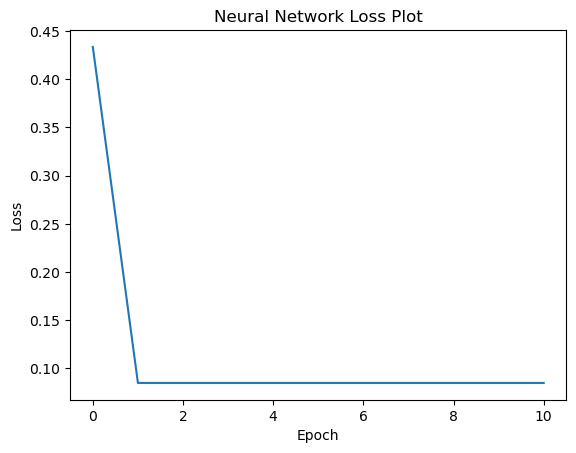

In [42]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Loss Plot')
plt.show()

**Why does the plot go flat suddenly?** The usage of vanilla Gradient Descent is not the best for neural network optimization due to the highly irregular shape of the loss landscape (non-convex). Therefore, it is very easy for the model parameters to get stuck in saddle points or in a local minima.